In [1]:
from utils.core import Vector
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df = Vector.load_folder('/Users/lila/data_viz/data')

✨💖 Loading CSVs ✨💖: 100%|██████████| 3040/3040 [00:11<00:00, 272.27it/s]


In [3]:
df.head()

,Timestamp,Accel_X,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,...,Color_G,Color_B,Color_C,BME680_Temp,Gas,Humidity,Pressure,GPS_Latitude,GPS_Longitude,GPS_Speed
0,8.75115,4.183850,0.053839,0.000764,-0.008858,0.013286,0.38738,-0.22946,-0.67970,16.5,...,0.0,0.0,19.308711,78038.0,53.611331,1010.510860,NaN,NaN,NaN,0.815296
1,8.755338,4.200002,-0.001795,0.000764,-0.013592,0.016493,0.38374,-0.22386,-0.68040,17.5,...,0.0,0.0,19.316328,19495.0,53.528989,1010.516422,NaN,NaN,NaN,0.812597
2,8.772686,4.177868,0.026321,0.004887,-0.013592,0.018784,0.38094,-0.23282,-0.65870,17.5,...,0.0,0.0,19.362031,19441.0,53.477198,1010.523319,NaN,NaN,NaN,0.795742
3,8.749954,4.219743,0.034696,0.002291,-0.009927,0.016952,0.37450,-0.23730,-0.67354,17.5,...,0.0,0.0,19.410664,19622.0,53.374561,1010.535061,NaN,NaN,NaN,0.806361
4,8.763115,4.179065,0.009571,0.005651,-0.011148,0.017104,0.38374,-0.23142,-0.68908,17.5,...,0.0,0.0,19.400703,19176.0,53.098152,1010.534443,NaN,NaN,NaN,0.821975


In [4]:
df['BME680_Temp']

0        78038.0
1        19495.0
2        19441.0
3        19622.0
4        19176.0
          ...   
66435    22134.0
66436    22393.0
66437    22536.0
66438    22928.0
66439    23104.0
Name: BME680_Temp, Length: 66440, dtype: float64

In [5]:
pressure = Vector(
    data_points=df.loc[df['Pressure'] > 200, 'Pressure'])
gas = Vector(
    data_points=df.loc[df['Gas'] > 500, 'Gas']
)

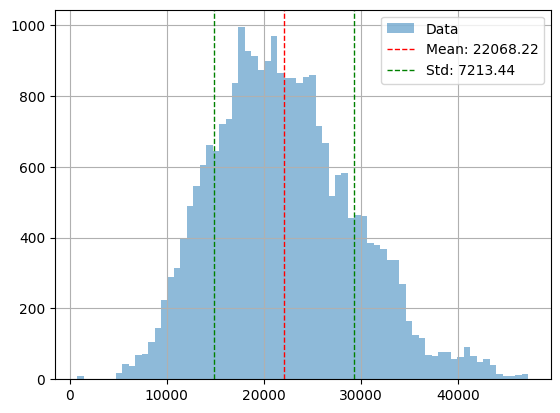

In [6]:
# just plot
gas.drop_na()
gas.drop_outliers()
gas.plot_basic_stats()

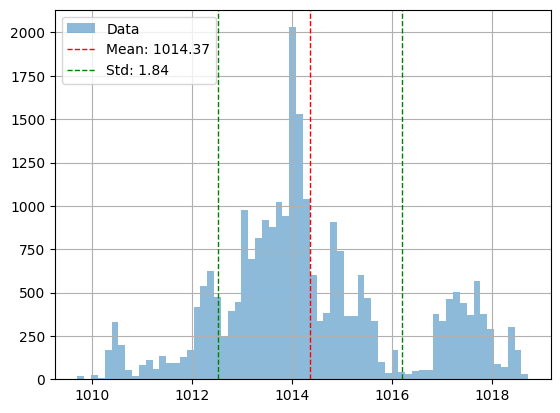

In [7]:
pressure.drop_na()
pressure.drop_outliers()
pressure.plot_basic_stats()


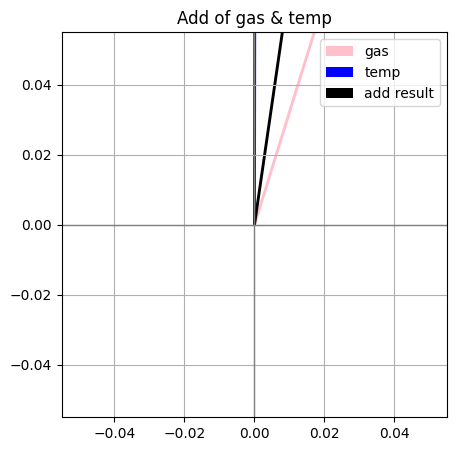

In [8]:
gas = Vector(data_points=df['Gas'], label='gas')
temp= Vector(data_points=df['Temp_LSM9DS1'], label='temp')
pressure = Vector(data_points=df['Pressure'], label='pressure')
Vector.plot_vector_op(gas, temp)

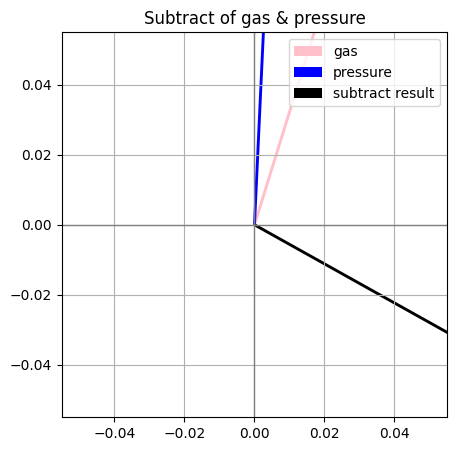

In [9]:
Vector.plot_vector_op(gas, pressure, op='subtract')

In [10]:
inter, outter, j = Vector.set_operations(gas, pressure)
print(j)

1.886721255801668e-05
